# Problema 39 y 40
## 39)
Tiremos $N = 1000$ números, obtenidos de una distribución *uniforme* $\in (0,1]$, sumémoslos y guardemos el resultado. Veamos qué distribución obtengo de esto al repetir estas tiradas $M = 10000$ veces <br>
Por el **Teorema del Límite Central** (TCL), esperamos una distribución Gausseana, tal que $\mu$ sea mayor al aumentar $N$, y que $\sigma$ disminuya al aumentar $M$. <br>
Luego, $P(X) \sim N(\mu , \sigma)$:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def run(n=1_000,m=10_000):  #cantidad de números.
                            #cantidad de realizaciones.
    S = np.empty(m)

    for j in range(m): #tiro n números m veces.
        
        x = np.random.random_sample(n) #Los N randoms
        S[j] = np.sum(x) #La suma
        
    mu = np.mean(S)
    sigma = np.std(S)

    return S,n,m,mu,sigma

S,N,M,mu,sigma = run()

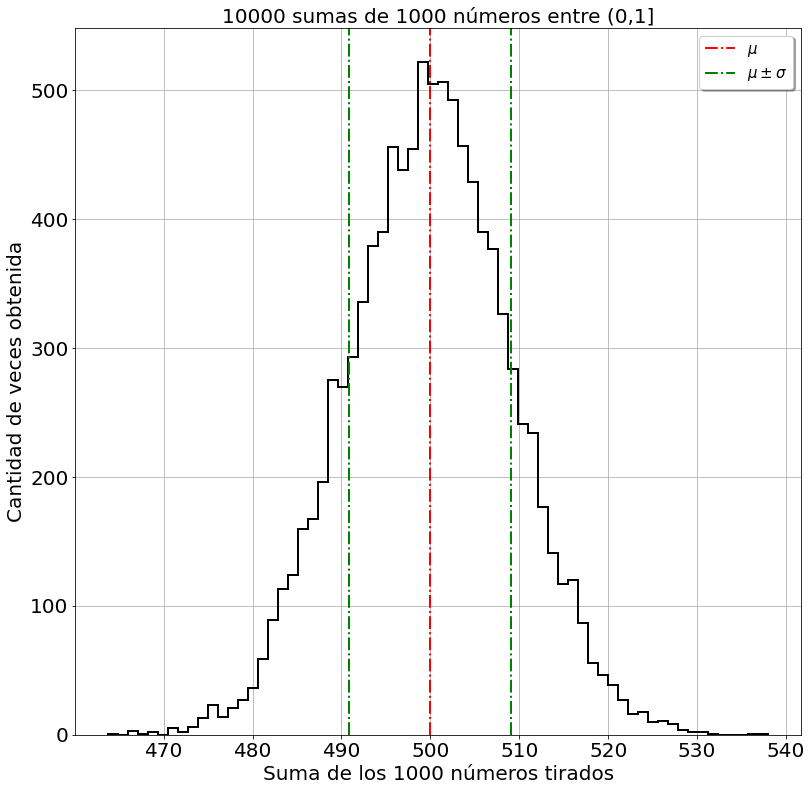

In [13]:
plt.figure(figsize=(13,13))
plt.xlabel(f'Suma de los {N} números tirados',size=20)
plt.ylabel('Cantidad de veces obtenida',size=20)
plt.title(f'{M} sumas de {N} números entre (0,1]',size=20)
plt.hist(S,bins='auto',histtype='step',lw=2,color='k')
plt.axvline(mu,lw=2,ls='-.',label='$\mu$',color='r')
plt.axvline(mu+sigma,lw=2,ls='-.',label='$\mu \pm \sigma$',color='g')
plt.axvline(mu-sigma,lw=2,ls='-.',color='g')
plt.legend(fontsize=15,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True);

Ajustemos pues, una **Gausseana**: $\mu =$ valor promedio de 1 número random (cada número $\in (0,1]$) multiplicado la cantidad de números sumados $N$; y la varianza $\sigma^2 = N$ multiiplicado la *varianza de la distribución* $U \sim (0,1)$. Entonces <br>
### <center> $\mu = 0.5 \cdot N$ ; $\sigma^2 = N \cdot \sigma^2_{U_{(0,1)}} = \frac{N}{12}$ </center> <br>

mu_fit (mean) = 500.0 
sigma_fit (std) = 9.128709291752768


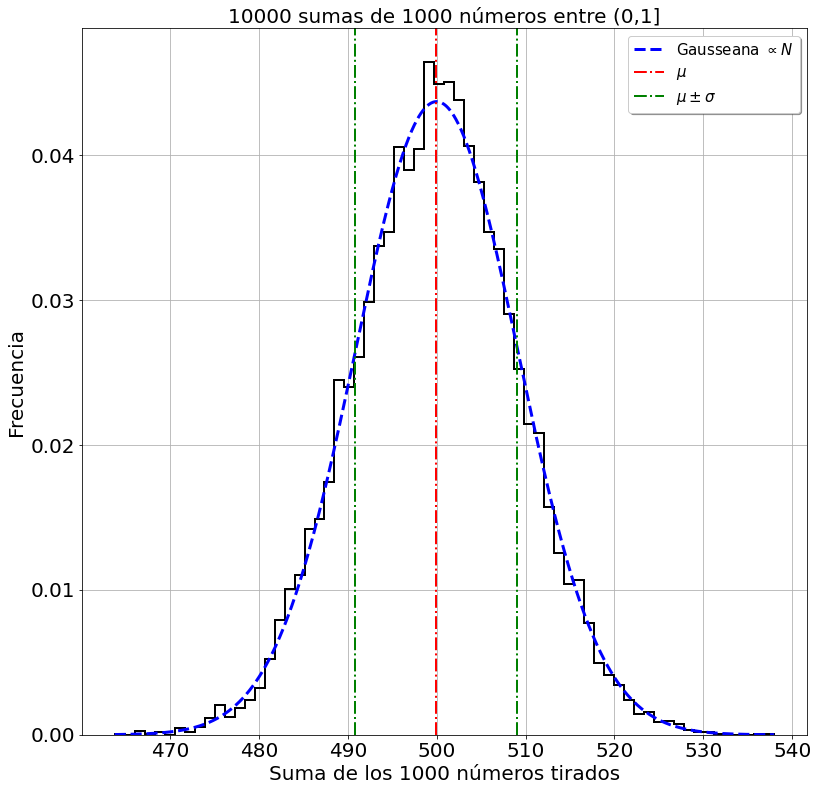

In [25]:
import scipy.stats as st

def fit(N,M,S): #¡Sólo depende de N! (S es para los límites de dibujado)

    mu_fit = 0.5*N
    sigma_fit = np.sqrt(N/12) #std = sqrt(var)

    z = np.linspace(min(S),max(S),1000)
    tn = st.norm.pdf(z,loc=mu_fit,scale=sigma_fit) #Gausseana teórica para mu y sigma calculados

    print(f'mu_fit (mean) = {mu_fit} \nsigma_fit (std) = {sigma_fit}')
    
    plt.figure(figsize=(13,13))
    plt.xlabel(f'Suma de los {N} números tirados',size=20)
    plt.ylabel('Frecuencia',size=20)
    plt.title(f'{M} sumas de {N} números entre (0,1]',size=20)
    plt.hist(S,bins='auto',density=True,histtype='step',lw=2,color='k')
    plt.plot(z,tn,label='Gausseana $\propto N$',color='b',linewidth=3,ls='--')
    plt.axvline(mu,lw=2,ls='-.',label='$\mu$',color='r')
    plt.axvline(mu+sigma,lw=2,ls='-.',label='$\mu \pm \sigma$',color='g')
    plt.axvline(mu-sigma,lw=2,ls='-.',color='g')
    plt.legend(fontsize=15,shadow=True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True);
    
    return

fit(N,M,S)

Entonces, probemos para diferentes valores de $N$ y $M$:

mu_fit (mean) = 5000.0 
sigma_fit (std) = 28.867513459481287


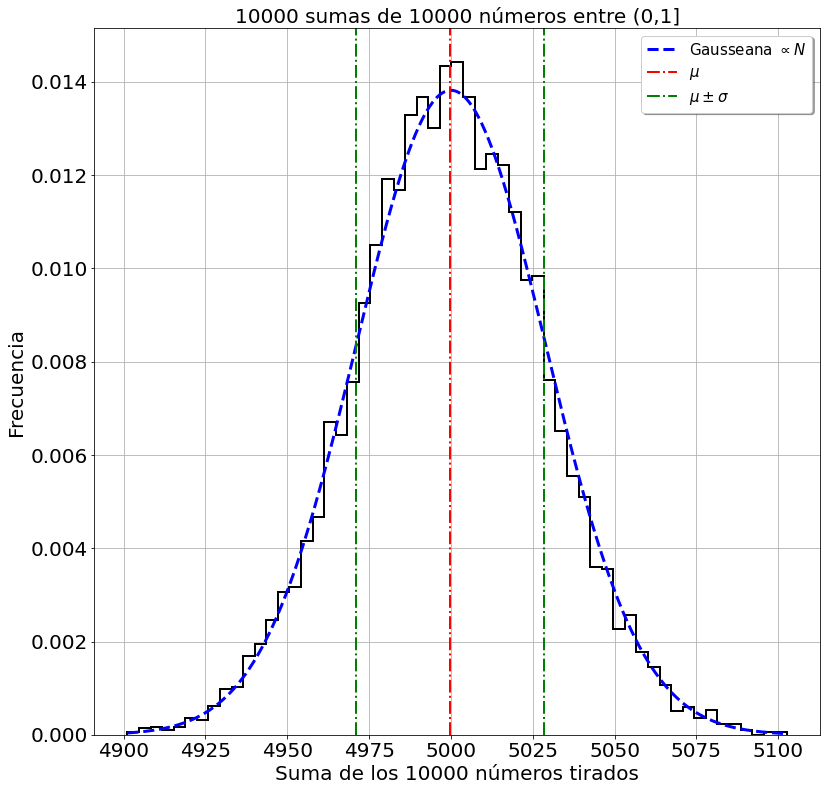

In [26]:
S,N,M,mu,sigma = run(n=10_000,m=10_000)
fit(N,M,S)

mu_fit (mean) = 50.0 
sigma_fit (std) = 2.886751345948129


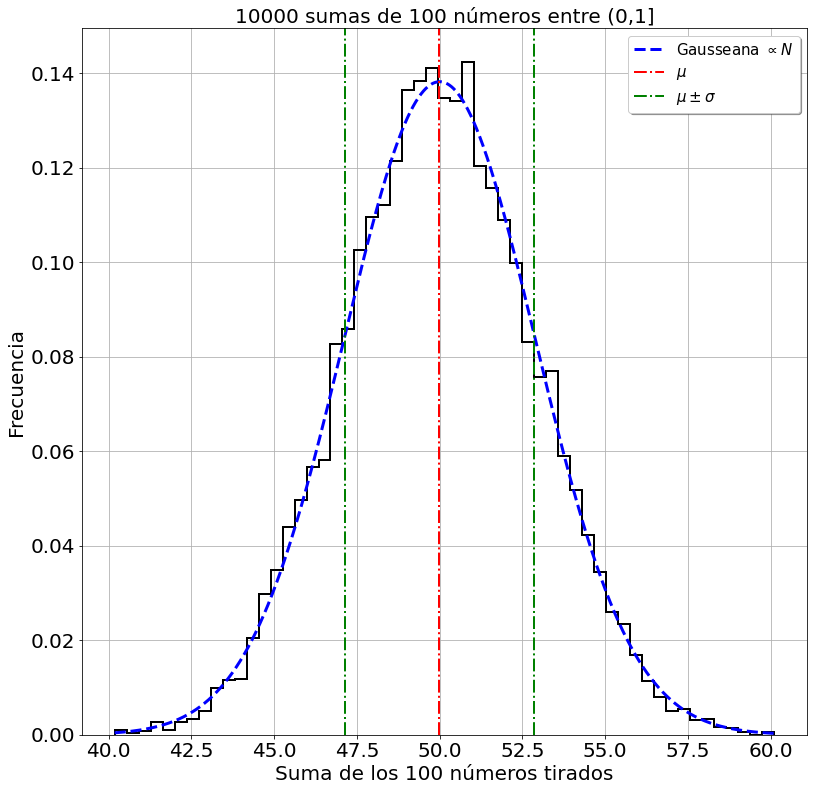

In [27]:
S,N,M,mu,sigma = run(n=100,m=10_000)
fit(N,M,S)

Dejando $M$ fijo, a mayor $N$ aumenta $\mu$ y $\sigma$ (por eso baja la "frecuencia" de los valores mostrado, abarcamos más valores posibles). <br>
Así como vimos en las fórmulas, $\mu \propto N$ y $\sigma \propto \sqrt{N}$. <br>

Cambiemos $M$:

mu_fit (mean) = 500.0 
sigma_fit (std) = 9.128709291752768


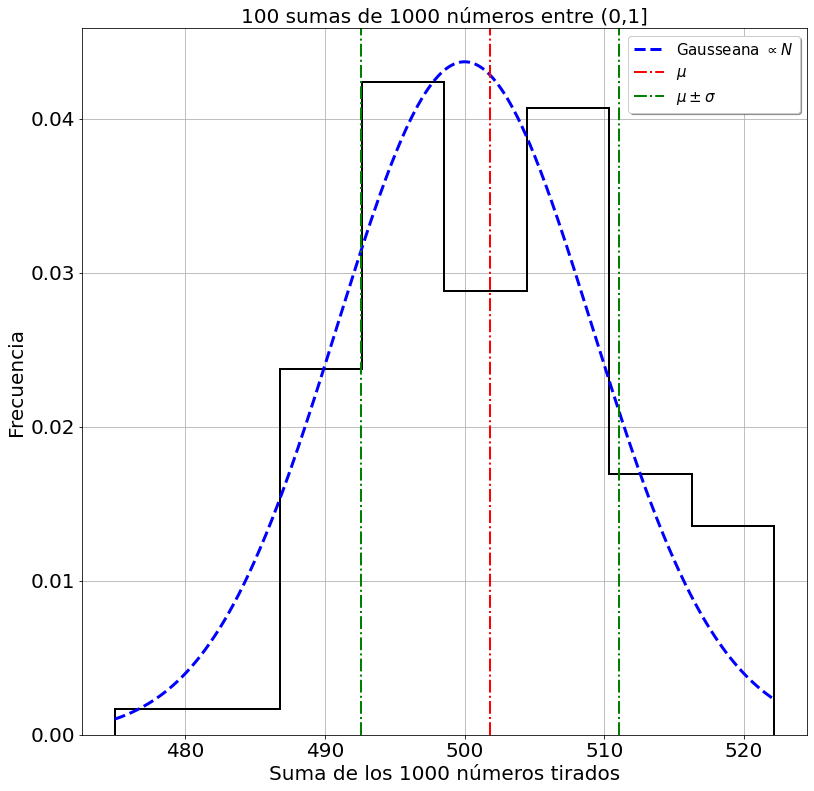

In [29]:
S,N,M,mu,sigma = run(n=1_000,m=100)
fit(N,M,S)

mu_fit (mean) = 500.0 
sigma_fit (std) = 9.128709291752768


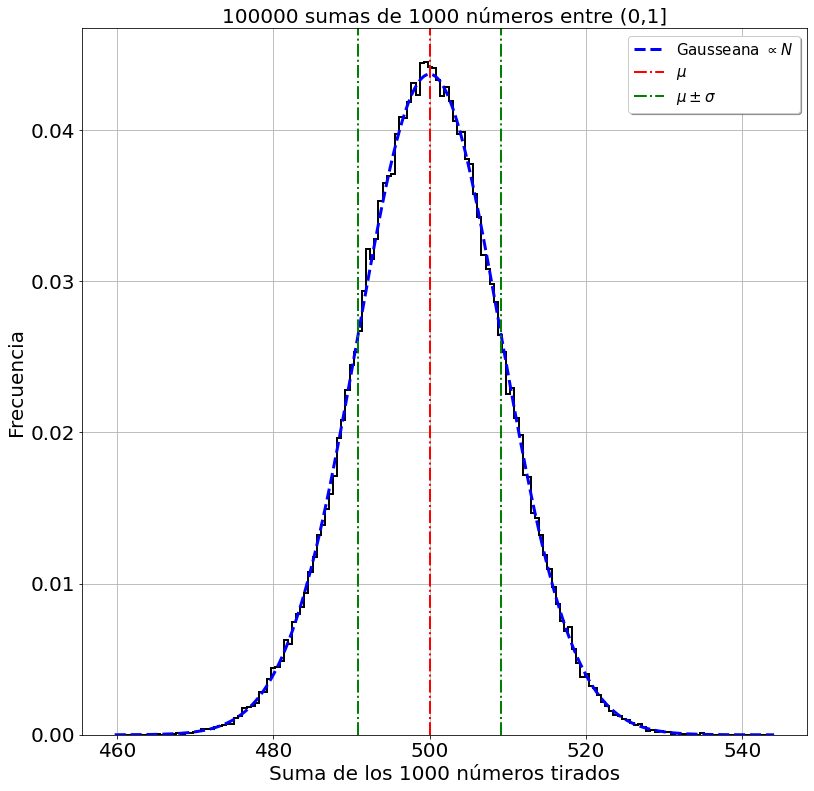

In [31]:
S,N,M,mu,sigma = run(n=1_000,m=100_000)
fit(N,M,S)

Y vemos que a mayor $M$, mejor ajusta la distribución obtenida a una **Gausseana**, acorde al *Teorema del Límite Central.*
## 40)
Queremos calcular numéricamente la integral con métodos *MonteCarlo (MC)* <br>
### <center> $I = \int_0^1 e^x dx \approx \frac{b-a}{N} \cdot \sum_{i=1}^{N} f(x_i)$ </center>
Esto es, tiro $N$ números: $N \sim U(0,1)$, evalúo y repito $M$ veces esta "tirada" de *randoms*. Luego calculo el valor y el error al ajustarle una Gausseana a la distribución de valores obtenidos de las $M$ runs.

In [68]:
def f(x):
    y = np.exp(x)
    return y

def MC(n=1_000,m=10_000,f=f,a=0,b=1):   #n = cantidad de números.
                                        #m = cantidad de realizaciones.
                                        #f = func a evaluar
                                        #(a,b) = dom
                
    S = np.empty(m)

    for j in range(m): #tiro n números m veces.
        
        x = (b-a) * np.random.random_sample(n) + a#Los N randoms
        S[j] = np.sum(f(x)/n) #La suma 
        
    mu = np.mean(S)
    sigma = np.std(S)
    
    print(f'El valor de la integral es {mu} +- {sigma}')

    return S,n,m,mu,sigma

El valor de la integral es 1.718167861244208 +- 0.015466930337540905


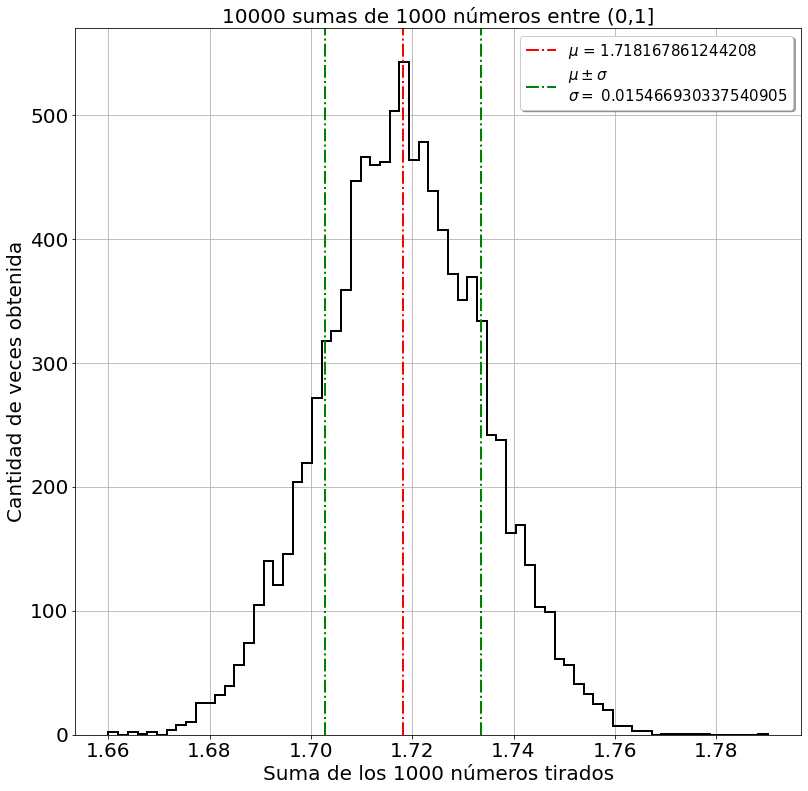

In [71]:
S,N,M,mu,sigma = MC()

plt.figure(figsize=(13,13))
plt.xlabel(f'Suma de los {N} números tirados',size=20)
plt.ylabel('Cantidad de veces obtenida',size=20)
plt.title(f'{M} sumas de {N} números entre (0,1]',size=20)
plt.hist(S,bins='auto',histtype='step',lw=2,color='k')
plt.axvline(mu,lw=2,ls='-.',label=f'$\mu$ = {mu}',color='r')
plt.axvline(mu+sigma,lw=2,ls='-.',label=f'$\mu \pm \sigma$ \n$\sigma =$ {sigma}',color='g')
plt.axvline(mu-sigma,lw=2,ls='-.',color='g')
plt.legend(fontsize=15,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True);

Nosotros ya vimos que $I \approx 1.7183$. Veamos si aumentamos $N$ y/o $M$

El valor de la integral es 1.7182460963568424 +- 0.004919005092257739


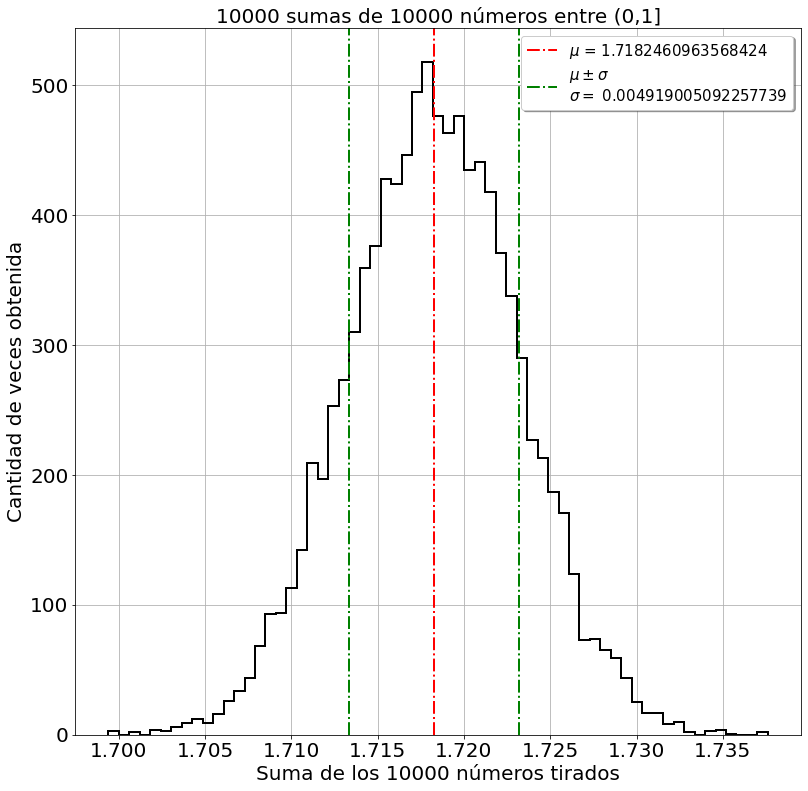

In [72]:
S,N,M,mu,sigma = MC(n=10_000)

plt.figure(figsize=(13,13))
plt.xlabel(f'Suma de los {N} números tirados',size=20)
plt.ylabel('Cantidad de veces obtenida',size=20)
plt.title(f'{M} sumas de {N} números entre (0,1]',size=20)
plt.hist(S,bins='auto',histtype='step',lw=2,color='k')
plt.axvline(mu,lw=2,ls='-.',label=f'$\mu$ = {mu}',color='r')
plt.axvline(mu+sigma,lw=2,ls='-.',label=f'$\mu \pm \sigma$ \n$\sigma =$ {sigma}',color='g')
plt.axvline(mu-sigma,lw=2,ls='-.',color='g')
plt.legend(fontsize=15,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True);

El valor de la integral es 1.7182789011365316 +- 0.015602293895575063


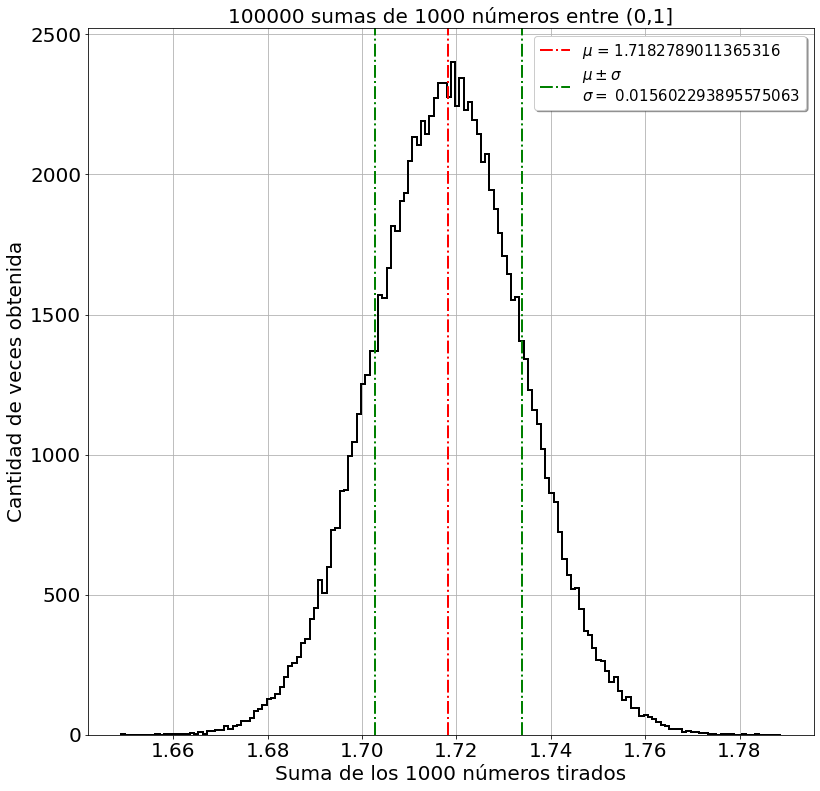

In [73]:
S,N,M,mu,sigma = MC(m=100_000)

plt.figure(figsize=(13,13))
plt.xlabel(f'Suma de los {N} números tirados',size=20)
plt.ylabel('Cantidad de veces obtenida',size=20)
plt.title(f'{M} sumas de {N} números entre (0,1]',size=20)
plt.hist(S,bins='auto',histtype='step',lw=2,color='k')
plt.axvline(mu,lw=2,ls='-.',label=f'$\mu$ = {mu}',color='r')
plt.axvline(mu+sigma,lw=2,ls='-.',label=f'$\mu \pm \sigma$ \n$\sigma =$ {sigma}',color='g')
plt.axvline(mu-sigma,lw=2,ls='-.',color='g')
plt.legend(fontsize=15,shadow=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True);

##### Y comprobamos que, si bien $\uparrow M \Rightarrow$ mejor ajuste de una Gausseana, necesitamos más muestreos ($\uparrow N$) para mejorar el ajuste (como vimos en 39), el ajuste es proporcional a $N$).

*Further more, este método si bien es robusto, converge lentamente*